In [82]:
from glob import glob

In [2]:
!cd /home/devyhia/hand_dataset/

In [4]:
!ls /home/devyhia/hand_dataset/

evaluation_code  README.txt  test_dataset  training_dataset  validation_dataset


In [5]:
!cat /home/devyhia/hand_dataset/README.txt

HAND Dataset
==== =======
A. Mittal, A. Zisserman and  P. H. S. Torr


Introduction
------------
We introduce a comprehensive dataset of hand images collected from various different public image data set sources as listed in [1]. A total of 13050 hand instances are annotated. Hand instances larger than a fixed area of bounding box (1500 sq. pixels) are considered 'big' enough for detections and are used for evaluation. This gives around 4170 high quality hand instances. While collecting the data, no restriction was imposed on the pose or visibility of people, nor was any constraint imposed on the environment.
In each image, all the hands that can be perceived clearly by humans are annotated. The annotations consist of a bounding rectangle, which does not have to be axis aligned, oriented with respect to the wrist. Please cite [1] if you use this dataset.

Contents
--------
This package contains:
- Training, Validation and Test datasets (all the images with hand bounding-box annotations

In [7]:
PWD = "/home/devyhia/hand_dataset/"

In [11]:
!cat $PWD/training_dataset/README.txt

HAND Dataset
==== =======
A. Mittal, A. Zisserman and  P. H. S. Torr


Introduction
------------
We introduce a comprehensive dataset of hand images collected from various different public image data set sources as listed in [1]. A total of 13050 hand instances are annotated. Hand instances larger than a fixed area of bounding box (1500 sq. pixels) are considered 'big' enough for detections and are used for evaluation. This gives around 4170 high quality hand instances. While collecting the data, no restriction was imposed on the pose or visibility of people, nor was any constraint imposed on the environment.
In each image, all the hands that can be perceived clearly by humans are annotated. The annotations consist of a bounding rectangle, which does not have to be axis aligned, oriented with respect to the wrist. Please cite [1] if you use this dataset.


Contents
--------
This package contains:
- Training dataset (all the images with hand bounding-box annotations).
- Code to visualiz

In [83]:
import numpy as np

In [84]:
from scipy.io import loadmat

In [85]:
from PIL import Image, ImageDraw

In [158]:
import sys

In [159]:
sys.path.append('/home/devyhia/models/slim/')

In [161]:
import Sharedd

In [167]:
img = Image.open('/home/devyhia/hand_dataset/training_dataset/training_data/images/Buffy_100.jpg')

In [87]:
from pprint import pprint

In [88]:
pprint(data['boxes'])

array([[ array([[ ([[488.4295494212492, 345.6226103157693]], [[461.5704505787508, 348.3773896842307]], [[465.5704505787508, 387.3773896842307]], [[492.4295494212492, 384.6226103157693]])]], 
      dtype=[('a', 'O'), ('b', 'O'), ('c', 'O'), ('d', 'O')]),
        array([[ ([[449.81237317998927, 397.2448898907434]], [[462.18762682001085, 426.75511010925646]], [[493.1876268200108, 413.7551101092565]], [[480.8123731799892, 384.2448898907435]])]], 
      dtype=[('a', 'O'), ('b', 'O'), ('c', 'O'), ('d', 'O')])]], dtype=object)


In [135]:
draw = ImageDraw.Draw(img)

In [125]:
from collections import namedtuple

In [126]:
Point = namedtuple('Point', ['x', 'y'])
FourPointBox = namedtuple('FourPointBox', ['a', 'b', 'c', 'd'])
TwoPointBox = namedtuple('TwoPointBox', ['x1', 'y1', 'x2', 'y2'])

In [156]:
annots = glob('/home/devyhia/hand_dataset/training_dataset/training_data/annotations/*.mat') + \
glob('/home/devyhia/hand_dataset/validation_dataset/validation_data/annotations/*.mat') + \
glob('/home/devyhia/hand_dataset/test_dataset/test_data/annotations/*.mat')

In [168]:
img.size

(555, 563)

In [163]:
N = len(annots)
for i, annot_file in enumerate(annots):
    # annot_file: '/home/devyhia/hand_dataset/training_dataset/training_data/annotations/Buffy_1.mat'
    data = loadmat(annot_file)

    fourPointBoxes = []
    twoPointBoxes = []

    for box_idx in range(data['boxes'].shape[1]):
        box = data['boxes'][0,box_idx][0,0]

        box4points = FourPointBox(
            a=Point(x=box[0][0,1], y=box[0][0,0]),
            b=Point(x=box[1][0,1], y=box[1][0,0]),
            c=Point(x=box[2][0,1], y=box[2][0,0]),
            d=Point(x=box[3][0,1], y=box[3][0,0])
        )

        box2points = TwoPointBox(
            x1=min(box4points.a.x, box4points.b.x, box4points.c.x, box4points.d.x),
            y1=min(box4points.a.y, box4points.b.y, box4points.c.y, box4points.d.y),
            x2=max(box4points.a.x, box4points.b.x, box4points.c.x, box4points.d.x),
            y2=max(box4points.a.y, box4points.b.y, box4points.c.y, box4points.d.y),
        )

        fourPointBoxes.append(box4points)
        twoPointBoxes.append(box2points)

    with open(annot_file.replace('.mat', '.fourPointBoxes'), 'w') as f:
        pickle.dump(fourPointBoxes, f)
    
    with open(annot_file.replace('.mat', '.twoPointBoxes'), 'w') as f:
        pickle.dump(twoPointBoxes, f)
    
    Shared.update_screen('\r{} out of {}'.format(i+1, N))

5628 out of 5628

In [146]:
import pickle

In [149]:
with open('test.picke', 'w') as f:
    pickle.dump(fourPointBoxes, f)

In [151]:
with open('test.picke', 'r') as f:
    print(pickle.load(f))

[FourPointBox(a=Point(x=345.62261031576929, y=488.42954942124919), b=Point(x=348.37738968423071, y=461.57045057875081), c=Point(x=387.37738968423071, y=465.57045057875081), d=Point(x=384.62261031576929, y=492.42954942124919)), FourPointBox(a=Point(x=397.24488989074342, y=449.81237317998927), b=Point(x=426.75511010925646, y=462.18762682001085), c=Point(x=413.75511010925652, y=493.18762682001079), d=Point(x=384.24488989074348, y=480.81237317998921))]


In [115]:
draw.line((box[0][0,1], box[0][0,0], box[1][0,1], box[1][0,0]), fill='red')
draw.line((box[1][0,1], box[1][0,0], box[2][0,1], box[2][0,0]), fill='red')
draw.line((box[2][0,1], box[2][0,0], box[3][0,1], box[3][0,0]), fill='red')
draw.line((box[3][0,1], box[3][0,0], box[0][0,1], box[0][0,0]), fill='red')

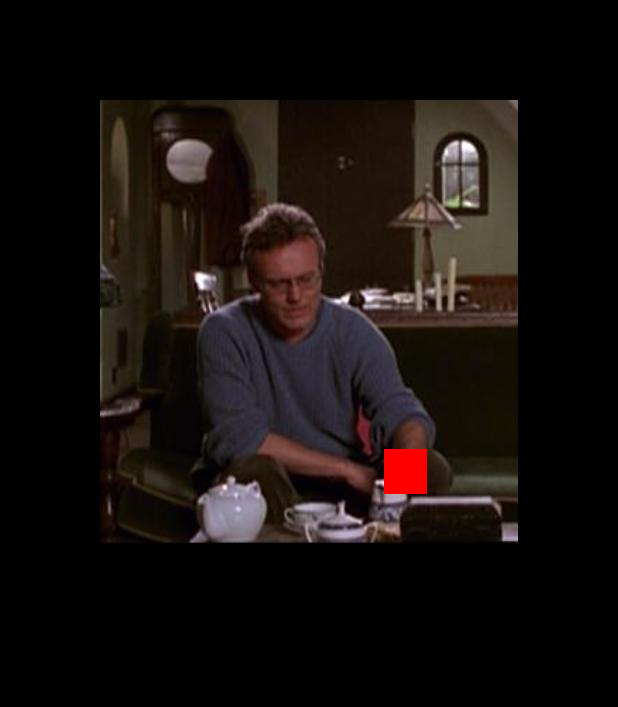

In [137]:
img

In [80]:
data['boxes'][0,0][0][0][0]

array([[ 488.42954942,  345.62261032]])

In [56]:
draw = ImageDraw.Draw(img)
for i in range(len(data['boxes'][0])):
    box = data['boxes'][0][i][0][0]
    draw.rectangle((box[0], box[1], box[2], box[3]))

TypeError: only length-1 arrays can be converted to Python scalars